## Step 1: Data Collection

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Checking the missing value and corresponding value of the target column.
df[df['TotalCharges'].isnull()][['TotalCharges','Churn']]


,TotalCharges,Churn
488,NaN,No
753,NaN,No
936,NaN,No
1082,NaN,No
1340,NaN,No
3331,NaN,No
3826,NaN,No
4380,NaN,No
5218,NaN,No
6670,NaN,No


In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

<AxesSubplot:ylabel='Churn'>

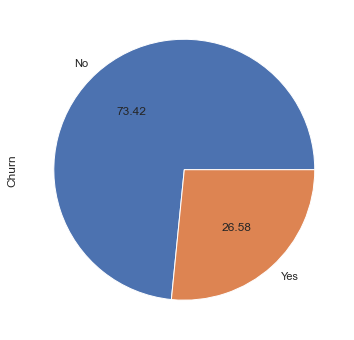

In [11]:
df['Churn'].value_counts().plot(kind='pie',autopct='%.2f')

In [12]:
df_cat=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
           'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']]
df_num=df[['tenure','MonthlyCharges', 'TotalCharges']]

In [13]:
#Get the how many unique values in the categorical features.

for i in df_cat.columns:
  print(i,":",df_cat[i].nunique(),'\n',df_cat[i].unique(),'\n')

gender : 2 
 ['Female' 'Male'] 

SeniorCitizen : 2 
 [0 1] 

Partner : 2 
 ['Yes' 'No'] 

Dependents : 2 
 ['No' 'Yes'] 

PhoneService : 2 
 ['No' 'Yes'] 

MultipleLines : 3 
 ['No phone service' 'No' 'Yes'] 

InternetService : 3 
 ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity : 3 
 ['No' 'Yes' 'No internet service'] 

OnlineBackup : 3 
 ['Yes' 'No' 'No internet service'] 

DeviceProtection : 3 
 ['No' 'Yes' 'No internet service'] 

TechSupport : 3 
 ['No' 'Yes' 'No internet service'] 

StreamingTV : 3 
 ['No' 'Yes' 'No internet service'] 

StreamingMovies : 3 
 ['No' 'Yes' 'No internet service'] 

Contract : 3 
 ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling : 2 
 ['Yes' 'No'] 

PaymentMethod : 4 
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 



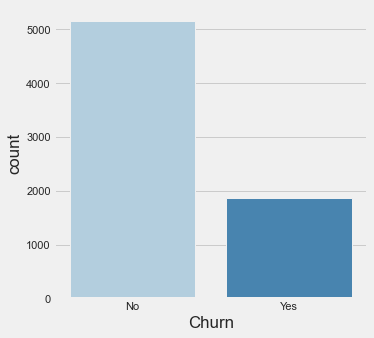

In [14]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=df['Churn'], palette="Blues", linewidth=1)
plt.show()

In [15]:
# Create a function to generate boxplots.
plots = {1 : [111], 2: [121, 122], 3: [131, 132, 133], 4: [221, 222, 223, 224], 5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236]}

def boxplot(x, y, df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=df[[x, j]], palette="Blues", linewidth=1)
        ax.set_title(j)
        
    return plt.show()

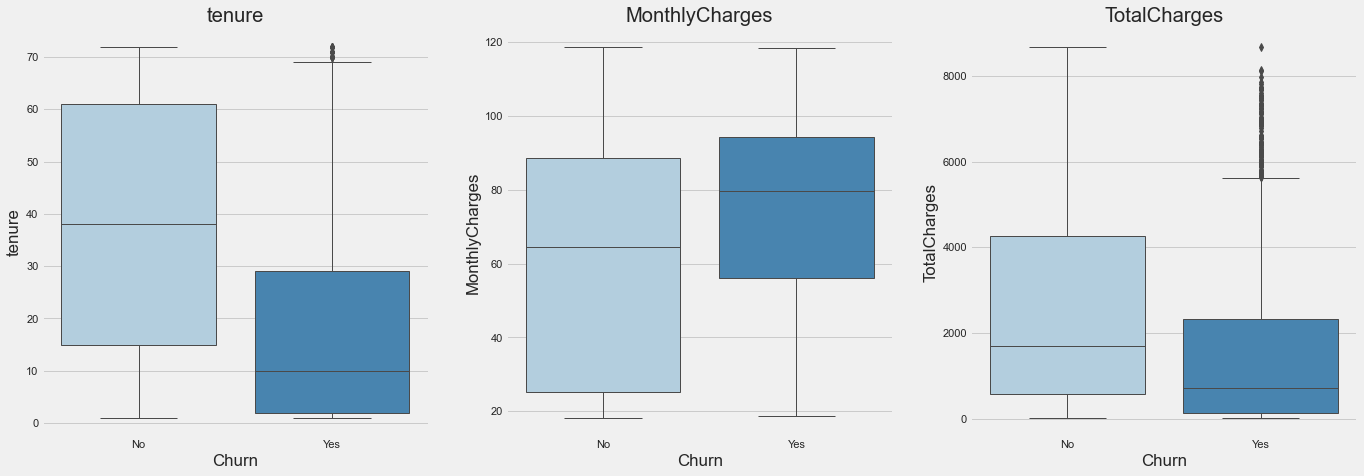

In [16]:
# Generate boxplots for tenure, MonthlyCharges and TotalCharges.
boxplot("Churn", ["tenure", "MonthlyCharges", "TotalCharges"], df)

In [17]:
# Create a function to generate countplots:
def countplot(x, y, df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)
        
    return plt.show()

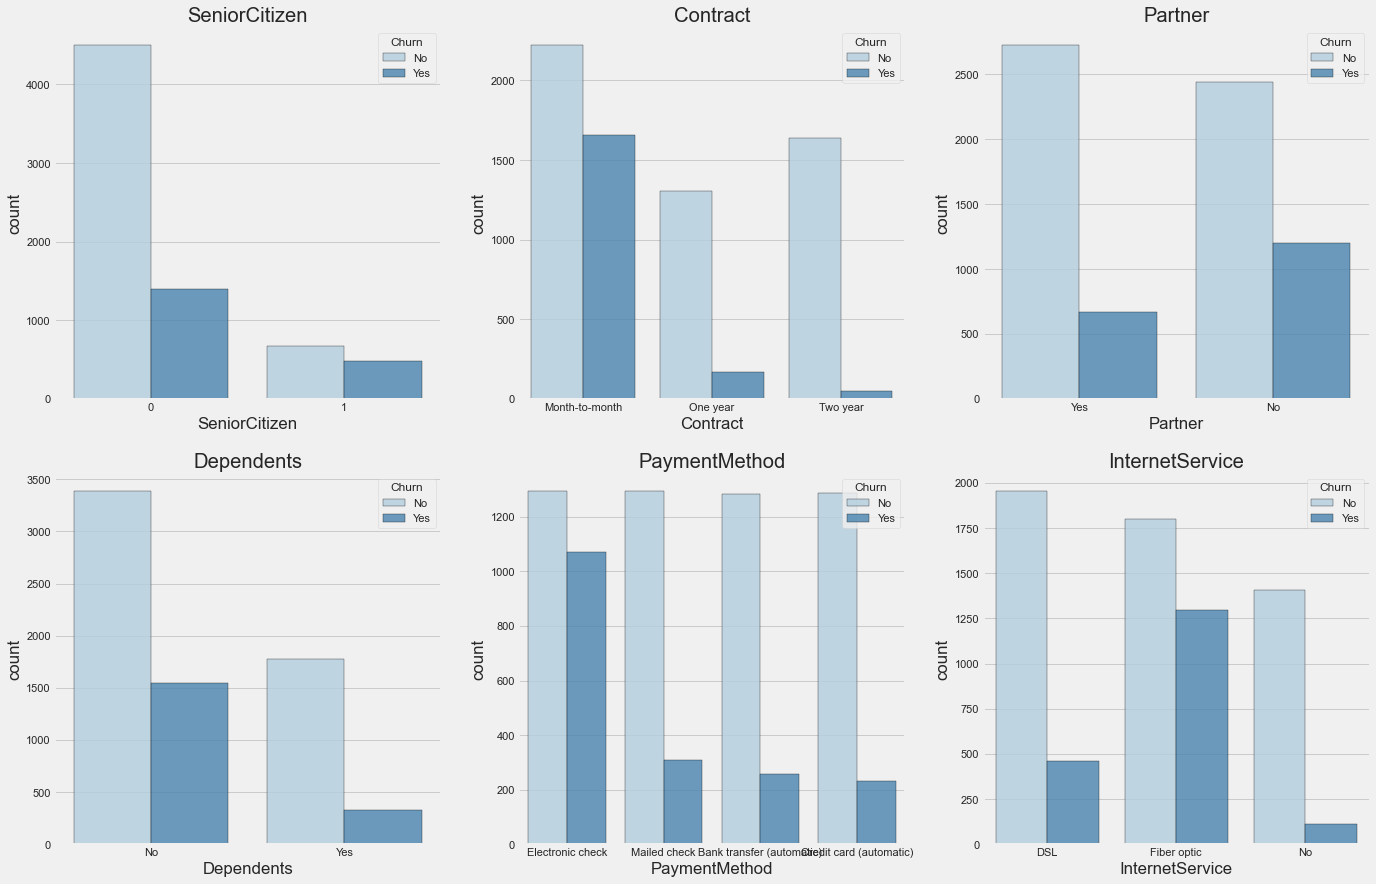

In [18]:
# Generate countplots for various features.
countplot("Churn", ['SeniorCitizen', 'Contract', 'Partner', 'Dependents', 'PaymentMethod', 'InternetService'], df)

In [19]:
df_cat.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [20]:
df_service=df[['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']]
df_service

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport
0,No,No phone service,DSL,No,Yes,No,No
1,Yes,No,DSL,Yes,No,Yes,No
2,Yes,No,DSL,Yes,Yes,No,No
3,No,No phone service,DSL,Yes,No,Yes,Yes
4,Yes,No,Fiber optic,No,No,No,No
...,...,...,...,...,...,...,...
7038,Yes,Yes,DSL,Yes,No,Yes,Yes
7039,Yes,Yes,Fiber optic,No,Yes,Yes,No
7040,No,No phone service,DSL,Yes,No,No,No
7041,Yes,Yes,Fiber optic,No,No,No,No


In [21]:
for i in df_service.columns:
  print(i,'\n',df_service[i].unique(),'\n')

PhoneService 
 ['No' 'Yes'] 

MultipleLines 
 ['No phone service' 'No' 'Yes'] 

InternetService 
 ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity 
 ['No' 'Yes' 'No internet service'] 

OnlineBackup 
 ['Yes' 'No' 'No internet service'] 

DeviceProtection 
 ['No' 'Yes' 'No internet service'] 

TechSupport 
 ['No' 'Yes' 'No internet service'] 



In [22]:
df_service['PhoneService']=df_service['PhoneService'].map({'No':0,'Yes':1})
df_service['MultipleLines']=df_service['MultipleLines'].map({'No':0,'Yes':1,'No phone service':0})
df_service['InternetService']=df_service['InternetService'].map({'No':0,'DSL':1,'Fiber optic':1})
df_service['OnlineSecurity']=df_service['OnlineSecurity'].map({'No':0,'Yes':1,'No internet service':0})
df_service['OnlineBackup']=df_service['OnlineBackup'].map({'No':0,'Yes':1,'No internet service':0})
df_service['DeviceProtection']=df_service['DeviceProtection'].map({'No':0,'Yes':1,'No internet service':0})
df_service['TechSupport']=df_service['TechSupport'].map({'No':0,'Yes':1,'No internet service':0})

In [23]:
for i in df_service.columns:
  print(i,'\n',df_service[i].unique(),'\n')

PhoneService 
 [0 1] 

MultipleLines 
 [0 1] 

InternetService 
 [1 0] 

OnlineSecurity 
 [0 1] 

OnlineBackup 
 [1 0] 

DeviceProtection 
 [0 1] 

TechSupport 
 [0 1] 



In [24]:
df['total_service_taken']=df_service.sum(axis=1)
df['total_service_taken'].unique()


array([2, 4, 5, 3, 1, 7, 6], dtype=int64)

In [25]:
df_num.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


In [26]:
df_cat

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [27]:
# H0: Target variable and features are independent.

from scipy.stats import chi2_contingency,chi2
for i in df_cat.columns:
  chi2_value, p, dof, expected_table = chi2_contingency(pd.crosstab(df[i],df['Churn']))
  if p>=0.05:
    print(i,'\n',p,'\n')

gender 
 0.4904884707065509 

PhoneService 
 0.34992398942431924 



In [28]:
df_cat=pd.get_dummies(df_cat,drop_first=True)
df_cat

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,0,1,0,0,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,0,1,1,1,0,1,1,0,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,1,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [29]:
df['Churn']=df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)
dff=pd.concat([df_num,df_cat],axis=1)
x=dff
y=df.Churn

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=105)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,plot_confusion_matrix, precision_score
from sklearn.metrics import recall_score,roc_auc_score,f1_score,roc_curve, confusion_matrix, f1_score

In [32]:
## Scaling the features with MinMaxScaler

ss=MinMaxScaler()
xtrain=pd.DataFrame(ss.fit_transform(xtrain),columns=x.columns)
xtest=pd.DataFrame(ss.transform(xtest),columns=x.columns)

<AxesSubplot:xlabel='Churn', ylabel='count'>

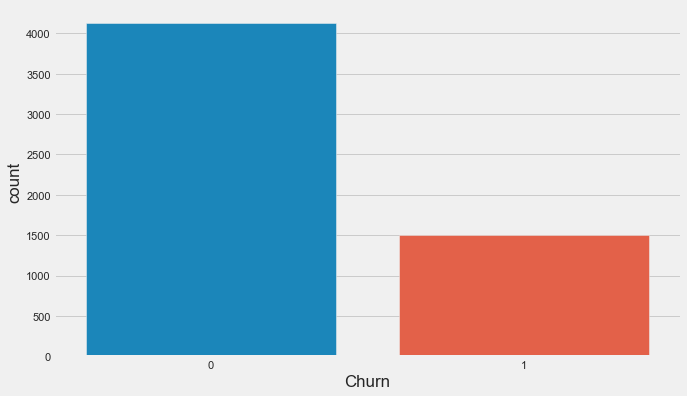

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(ytrain)

In [34]:
xtrain.columns


Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [35]:
y.value_counts()/y.size

0    0.734215
1    0.265785
Name: Churn, dtype: float64

In [36]:
def train_accuracy(v):
    return(accuracy_score(ytrain,v.predict(xtrain)))

def test_accuracy(w):
    return(accuracy_score(ytest,w.predict(xtest)))
    
def roc_cur(a):
    fpr,tpr,threshold=roc_curve(ytest,a.predict_proba(xtest)[:,1])
    plt.plot(fpr,tpr)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.plot([0,1],[0,1],'r--')
def roc_score(b):
    return(roc_auc_score(ytest,b.predict(xtest)))

def class_report(c):
    print("Classification_report:", classification_report((ytest,c.predict(xtest))))

def sen(d):
    h=confusion_matrix(ytest,d.predict(xtest))
    sensitivity=h[1][1]/((h[1][1]+h[1][0]))
    return sensitivity
def spe(e):
    g=confusion_matrix(ytest,e.predict(xtest))
    sensitivity=g[0][0]/((g[0][0]+g[0][1]))
    return sensitivity

def f_score(f):
    return(f1_score(ytest,f.predict(xtest)))

def f1_w(i):
    labels=[0,1]
    f=f1_score(ytest,i.predict(xtest),average=None,labels=labels)
    return(round(((f[0]*ytest.value_counts()[0])+(f[1]*ytest.value_counts()[1]))/(ytest.value_counts()[0]+ytest.value_counts()[1]),4))


score_card = pd.DataFrame(columns=['Model_Name', 'Train_Accuracy', 'Test_Accuracy',
                                       'ROC_Score','Specificity','Sensitivity'])

def update_score_card(algorithm_name, model):
    
    global score_card

    score_card = score_card.append({'Model_Name': algorithm_name, 'Train_Accuracy': train_accuracy(model),
                                    'Test_Accuracy': test_accuracy(model), 'ROC_Score': roc_score(model),
                                    'Specificity':spe(model),'Sensitivity':sen(model),
                                    }, ignore_index = True)

In [37]:
def scores(a):
    print("Train_Accuracy_Score:",round(accuracy_score(ytrain,a.predict(xtrain)),3))
    print("Test_Accuracy_Score:",round(accuracy_score(ytest,a.predict(xtest)),3))
    print('\n')
    fpr,tpr,threshold=roc_curve(ytest,a.predict_proba(xtest)[:,1])
    plt.plot(fpr,tpr)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.plot([0,1],[0,1],'r--')
    
    print("roc_auc_score:",round(roc_auc_score(ytest,a.predict(xtest)),3))
    print('\n')
    print("Classification_report:\n", classification_report(ytest,a.predict(xtest)))
    
    
    plot_confusion_matrix(a,xtest,ytest)
    print(confusion_matrix(ytest,a.predict(xtest)))

## Logistic regression

Train_Accuracy_Score: 0.803
Test_Accuracy_Score: 0.809


roc_auc_score: 0.724


Classification_report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.67      0.54      0.60       372

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407

[[936  99]
 [170 202]]


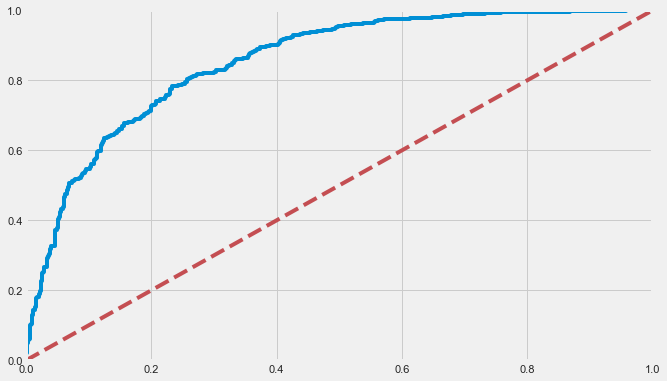

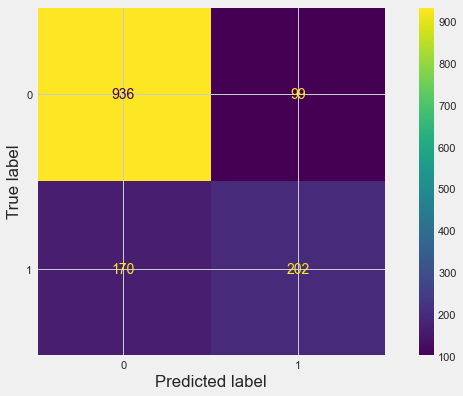

In [38]:
logreg=LogisticRegression(random_state=25)
logreg_model=logreg.fit(xtrain,ytrain)

scores(logreg_model)

update_score_card('LogisticRegression',logreg_model)

## K nearest neighbour 

Train_Accuracy_Score: 0.834
Test_Accuracy_Score: 0.774


roc_auc_score: 0.699


Classification_report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1035
           1       0.58      0.54      0.56       372

    accuracy                           0.77      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.77      0.77      0.77      1407

[[888 147]
 [171 201]]


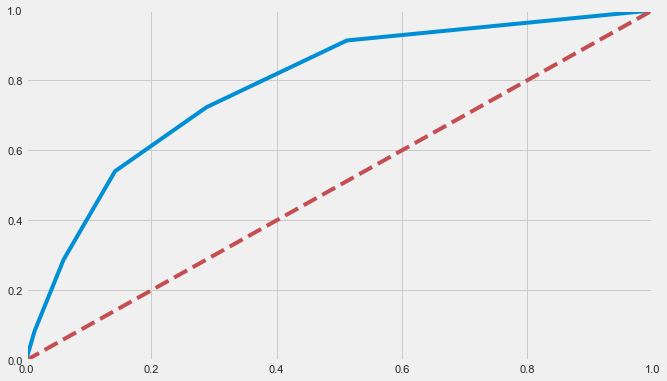

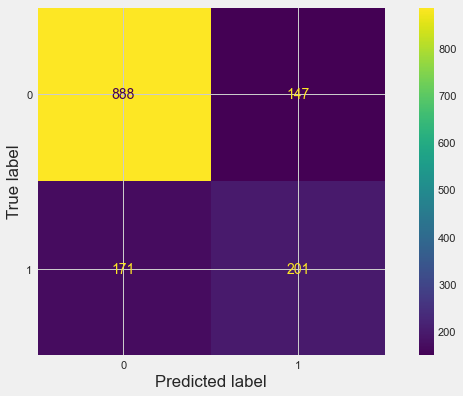

In [39]:
knn=KNeighborsClassifier()
knn_model=knn.fit(xtrain,ytrain)

scores(knn_model)
update_score_card('KNeighborsClassifier',knn_model)

## Decision tree classifier 

Train_Accuracy_Score: 0.998
Test_Accuracy_Score: 0.732


roc_auc_score: 0.648


Classification_report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1035
           1       0.49      0.47      0.48       372

    accuracy                           0.73      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407

[[855 180]
 [197 175]]


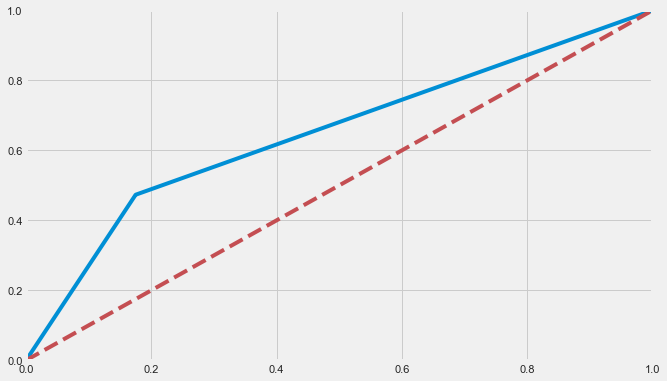

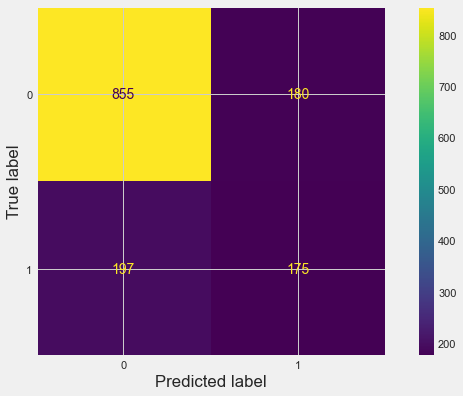

In [40]:
dt=DecisionTreeClassifier()
dt_model=dt.fit(xtrain,ytrain)

scores(dt_model)
update_score_card('DecisionTreeClassifier',dt_model)

## Random forest Classifier 

Train_Accuracy_Score: 0.998
Test_Accuracy_Score: 0.794


roc_auc_score: 0.689


Classification_report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.65      0.47      0.55       372

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

[[943  92]
 [198 174]]


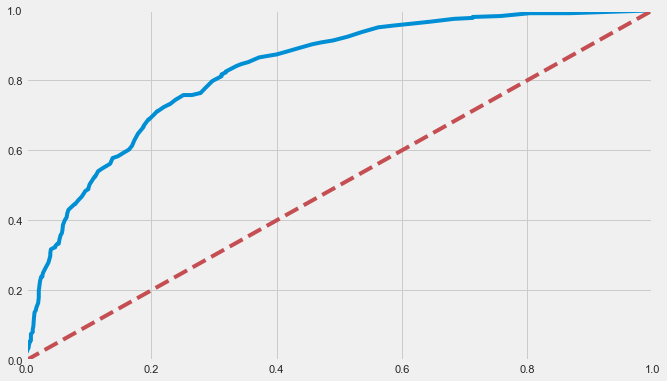

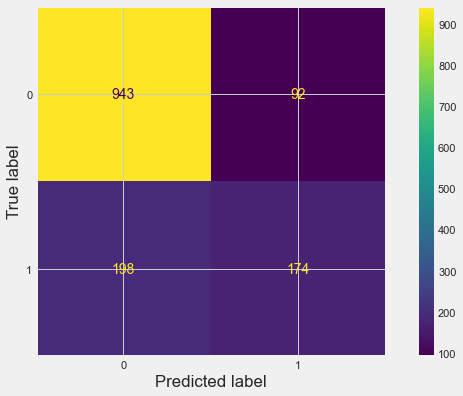

In [41]:
rf=RandomForestClassifier()
rf_model=rf.fit(xtrain,ytrain)

scores(rf_model)
update_score_card('RandomForestClassifier',rf_model)

## Ada boost Classifier 

Train_Accuracy_Score: 0.807
Test_Accuracy_Score: 0.811


roc_auc_score: 0.726


Classification_report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1035
           1       0.68      0.55      0.60       372

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407

[[938  97]
 [169 203]]


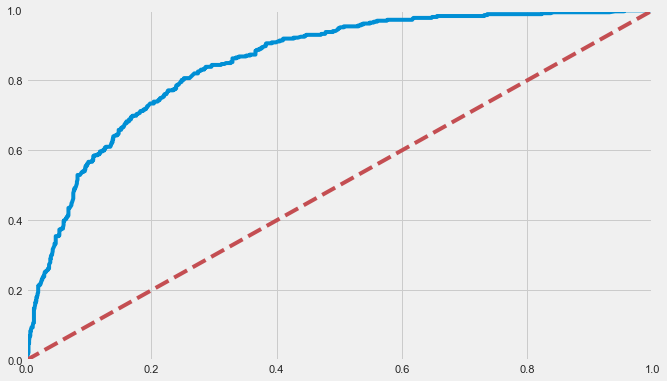

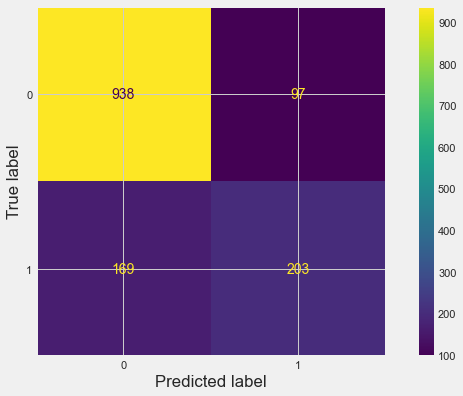

In [42]:
adb=AdaBoostClassifier()
ab_model=adb.fit(xtrain,ytrain)

scores(ab_model)
update_score_card('AdaBoostClassifier',ab_model)

## Gradient Boosting Classifier

Train_Accuracy_Score: 0.822
Test_Accuracy_Score: 0.8


roc_auc_score: 0.714


Classification_report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.53      0.58       372

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407

[[929 106]
 [175 197]]


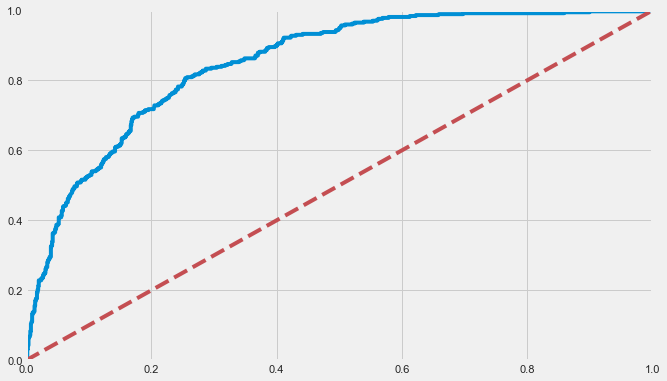

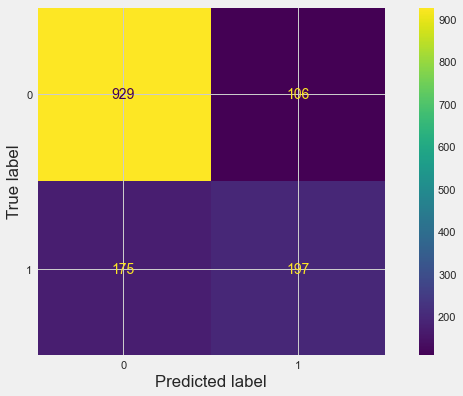

In [43]:
gd=GradientBoostingClassifier()
gd_model=gd.fit(xtrain,ytrain)

scores(gd_model)
update_score_card('GradientBoostingClassifier',gd_model)

## XG boost Classifier 

Train_Accuracy_Score: 0.926
Test_Accuracy_Score: 0.792


roc_auc_score: 0.702


Classification_report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.51      0.57       372

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

[[925 110]
 [182 190]]


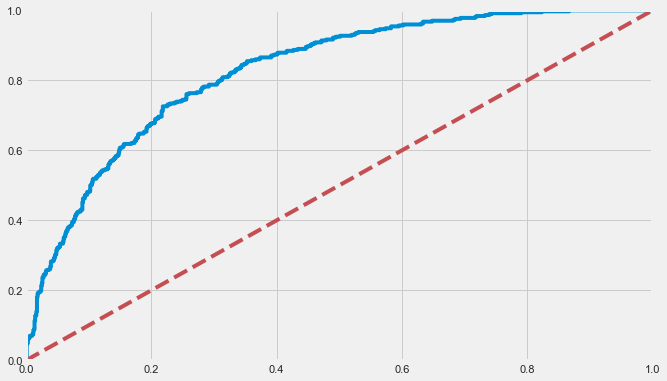

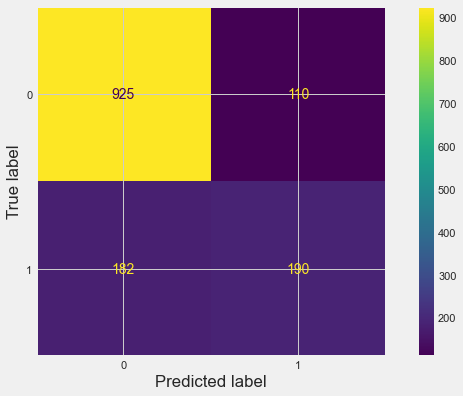

In [44]:
xg=XGBClassifier(random_state=25)
xg_model=xg.fit(xtrain,ytrain)

scores(xg_model)
update_score_card('XGBClassifier',xg_model)

In [45]:
pd.DataFrame(xg_model.feature_importances_,index=xtrain.columns,columns=['Imporance']).sort_values('Imporance',ascending=False)

,Imporance
InternetService_Fiber optic,0.445404
Contract_Two year,0.154728
InternetService_No,0.096768
Contract_One year,0.062200
tenure,0.029454
StreamingMovies_Yes,0.020699
PaymentMethod_Electronic check,0.014866
MultipleLines_Yes,0.014603
TechSupport_Yes,0.014120
StreamingTV_Yes,0.011673


In [46]:
score_card

,Model_Name,Train_Accuracy,Test_Accuracy,ROC_Score,Specificity,Sensitivity
0,LogisticRegression,0.802844,0.808813,0.723679,0.904348,0.543011
1,KNeighborsClassifier,0.833600,0.773987,0.699147,0.857971,0.540323
2,DecisionTreeClassifier,0.998044,0.732054,0.648259,0.826087,0.470430
3,RandomForestClassifier,0.998044,0.793888,0.689427,0.911111,0.467742
4,AdaBoostClassifier,0.806933,0.810945,0.725990,0.906280,0.545699
5,GradientBoostingClassifier,0.821689,0.800284,0.713577,0.897585,0.529570
6,XGBClassifier,0.925511,0.792466,0.702236,0.893720,0.510753
